<a href="https://colab.research.google.com/github/hpnightowl/Owlsbooks/blob/master/price_m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [73]:
data = pd.read_csv("melb_data.csv")

In [74]:
data.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [75]:
data.shape

(13580, 21)

In [76]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [77]:
data = data.drop(columns=['BuildingArea','YearBuilt'],axis=1)

removed these columns since more then or equal to 50% of data is null and will fill the councilArea with mean

In [78]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

In [79]:
data.CouncilArea.unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [80]:
data.Type.unique()

array(['h', 'u', 't'], dtype=object)

In [81]:
data['CouncilArea'].fillna(data['CouncilArea'].mode()[0], inplace=True)

In [82]:
data['Car'].fillna(data['Car'].median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Max Price 9000000.0
Min Price 85000.0
Mean Price 1075684.079455081


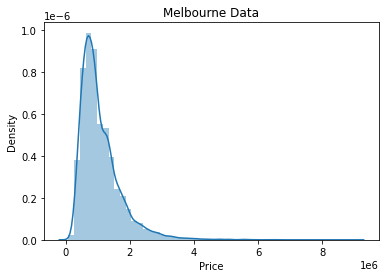

In [83]:
import seaborn as sns
fig1, bw = plt.subplots()
bw.set_title('Melbourne Data')

sns.distplot(data.Price);

print("Max Price", data.Price.max())
print("Min Price", data.Price.min())
print("Mean Price", data.Price.mean())

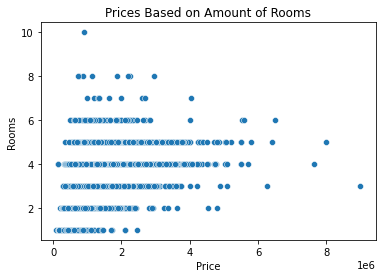

In [84]:
fig2, bw = plt.subplots()
bw.set_title('Prices Based on Amount of Rooms')

#Scatter Plot of Prices by Room Amount

#Display Scatterplot
sp = sns.scatterplot(x="Price", y="Rooms", data=data)

In [85]:
data.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.406935,0.025678,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.239109,0.037507,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.260596,0.025004,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050514,0.024558,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.403867,0.025646,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.321014,0.037130,-0.070594,0.118971,-0.052201
Car,0.406935,0.239109,0.260596,0.050514,0.403867,0.321014,1.000000,0.026780,-0.002023,0.062929,-0.024344
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026780,1.000000,0.009695,0.010833,-0.006854
Lattitude,0.015948,-0.212934,-0.130723,-0.406104,0.015925,-0.070594,-0.002023,0.009695,1.000000,-0.357634,0.047086
Longtitude,0.100771,0.203656,0.239425,0.445357,0.102238,0.118971,0.062929,0.010833,-0.357634,1.000000,0.065988


In [86]:
for i in data.columns:
  print(data[i].unique())

['Abbotsford' 'Airport West' 'Albert Park' 'Alphington' 'Altona'
 'Altona North' 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood'
 'Avondale Heights' 'Balaclava' 'Balwyn' 'Balwyn North' 'Bentleigh'
 'Bentleigh East' 'Box Hill' 'Braybrook' 'Brighton' 'Brighton East'
 'Brunswick' 'Brunswick West' 'Bulleen' 'Burwood' 'Camberwell'
 'Canterbury' 'Carlton North' 'Carnegie' 'Caulfield' 'Caulfield North'
 'Caulfield South' 'Chadstone' 'Clifton Hill' 'Coburg' 'Coburg North'
 'Collingwood' 'Doncaster' 'Eaglemont' 'Elsternwick' 'Elwood' 'Essendon'
 'Essendon North' 'Fairfield' 'Fitzroy' 'Fitzroy North' 'Flemington'
 'Footscray' 'Glen Iris' 'Glenroy' 'Gowanbrae' 'Hadfield' 'Hampton'
 'Hampton East' 'Hawthorn' 'Heidelberg Heights' 'Heidelberg West'
 'Hughesdale' 'Ivanhoe' 'Kealba' 'Keilor East' 'Kensington' 'Kew'
 'Kew East' 'Kooyong' 'Maidstone' 'Malvern' 'Malvern East' 'Maribyrnong'
 'Melbourne' 'Middle Park' 'Mont Albert' 'Moonee Ponds' 'Moorabbin'
 'Newport' 'Niddrie' 'North Melbourne' 'Northcote'

In [87]:
X = data.drop(columns=['Suburb','Regionname','Price','Type','Address','Distance','Lattitude','Method','SellerG','Date','Postcode','CouncilArea'])
y = data.Price

In [88]:
X

,Rooms,Bedroom2,Bathroom,Car,Landsize,Longtitude,Propertycount
0,2,2.0,1.0,1.0,202.0,144.99840,4019.0
1,2,2.0,1.0,0.0,156.0,144.99340,4019.0
2,3,3.0,2.0,0.0,134.0,144.99440,4019.0
3,3,3.0,2.0,1.0,94.0,144.99690,4019.0
4,4,3.0,1.0,2.0,120.0,144.99410,4019.0
...,...,...,...,...,...,...,...
13575,4,4.0,2.0,2.0,652.0,145.16761,7392.0
13576,3,3.0,2.0,2.0,333.0,144.87904,6380.0
13577,3,3.0,2.0,4.0,436.0,144.88738,6380.0
13578,4,4.0,1.0,5.0,866.0,144.89299,6380.0


In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=47)

In [90]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [91]:
y_pred = model.predict(X_test)

In [92]:
y_pred

array([ 655000., 1015000., 1215000., ..., 3250000.,  861500.,  820000.])

In [94]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3496643335532994